# **Students Performance Analysis**

#
---
---

# 0. Getting Ready

## 0.1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 0.2. Describing datasets and asking questions

This data is in csv format and it's about students performance. This data was imported from [Kaggle](https://www.kaggle.com)

####The questions are as follows:-

1. What is the most common gender, male or female?
2. What is the most common Parental degree?
3. What is the most common lunch type?
4. Are the students mostly ready for the tests or not?
5. What is the average for each subject, and which subject has the highest average?
6. What is the average total score and average percentage?
7. What is the relation between Parental education and students' percentage?
8. What is the relation between Lunch type and students' percentage?
9. What is the relation between Test preparations and students' percentage?
10. What is the relation between Test preparations and Lunch Type?
11. What is the relation between Parental Educational degree and Lunch Type?

## 0.3. Import the dataset

In [2]:
students = pd.read_csv('StudentsPerformance.csv')

#
---
---

# 1. Wrangling Data

## 1.1. Assess the dataset

### 1.1.1. View Cleanliness Problems

#### 1.1.1.1. View the shape of the dataset

In [3]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**We can see that the dataset has 7 columns x 1000 rows. The datatypes are perfectly chosen for the columns**

#### 1.1.1.2. Check completeness

In [4]:
students.isna().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


**No missing Values found**

#### 1.1.1.3. Check Uniqueness

In [5]:
students.duplicated().sum()

np.int64(0)

**No duplicates found**

#### 1.1.1.4. Check accuracy

In [6]:
students.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**No outliers or unlogical values**

#### 1.1.1.5. Check Consistency

In [7]:
students['gender'].value_counts()

,count
gender,
female,518
male,482


In [8]:
students['parental level of education'].value_counts()

,count
parental level of education,
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


In [9]:
students['lunch'].value_counts()

,count
lunch,
standard,645
free/reduced,355


**Good The data is consistent across different columns**

### 1.1.2. Check Tidiness Problems

In [10]:
students.sample(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
247,female,group B,high school,standard,completed,58,70,68
440,female,group C,some college,standard,completed,67,81,79


**No tidiness issues found. Each column represents a variable. Each row represents a record. Each table is a set of data**

### 1.1.3. Assessment Report

**Cleanliness**
- Invalid Dtypes : Dtypes are well chosen
- Completeness : Data is complete
- Uniqueness : No duplicates found
- Accuracy : No illogical data found
- Consistency : All data share the same format

**Tidiness**<br>
The table structure commit to the basic Tidiness rules

## 1.2. Clean the dataset

**No cleaning required, let's get ready for the analysis**

#
---
---

# 2. Getting the data ready for the analysis

## 2.1. Place a total marks column

In [11]:
students['total'] = students['math score'] + students['reading score'] + students['writing score']

In [12]:
students.sample()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
74,male,group C,some high school,standard,none,49,49,41,139


## 2.2. Place a percentage column

In [13]:
students['percentage'] = (students['total'] / 300) * 100

In [14]:
students.sample()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,percentage
234,male,group C,bachelor's degree,standard,completed,83,82,84,249,83.0


## 2.3. Remove the race/ethnicity column

In [15]:
students = students.drop('race/ethnicity', axis=1)

In [16]:
students.columns

Index(['gender', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total', 'percentage'],
      dtype='object')

## 2.4. Replace 'none' in Test preparation column with 'Not prepared' and 'complete' with 'Prepared'

In [17]:
students['test preparation course'] = students['test preparation course'].replace('none', 'Not prepared')
students['test preparation course'] = students['test preparation course'].replace('completed', 'Prepared')

In [18]:
students['test preparation course'].value_counts()

,count
test preparation course,
Not prepared,642
Prepared,358


#
---
---

# 3. Data analysis and Visualization

## Question 1: What is the most common gender, male or female?

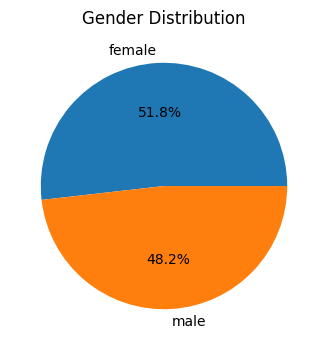

In [19]:
plt.figure(figsize=(8, 4))
plt.pie(students['gender'].value_counts(), labels=students['gender'].value_counts().index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

**In this data, Females are slightly more common than males**

## Question 2: What is the most common Parental degree?

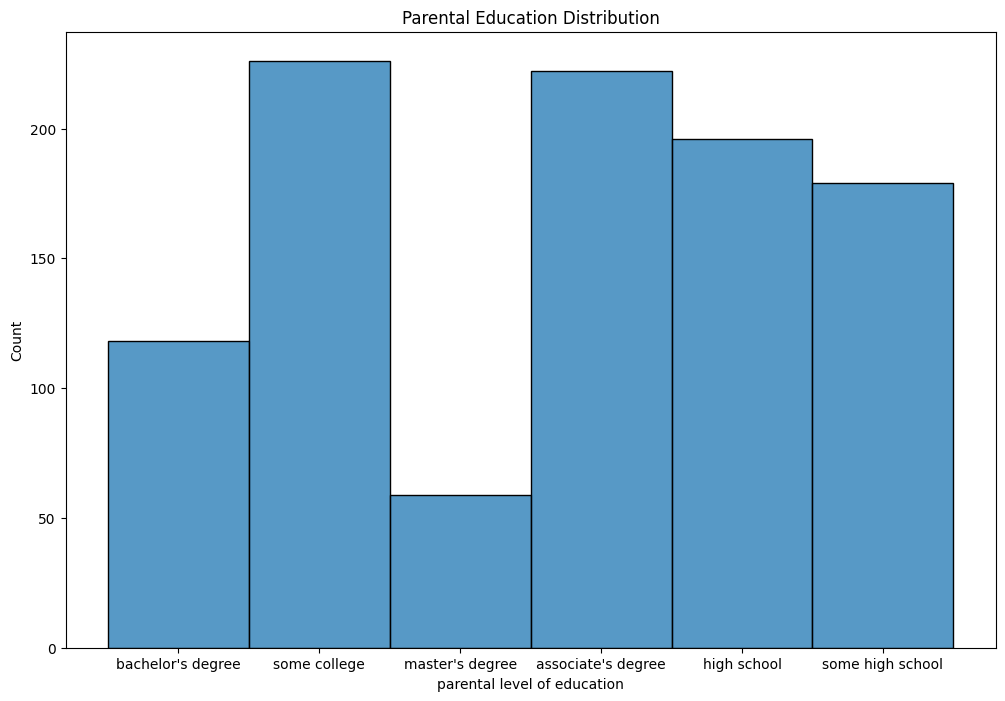

In [20]:
plt.figure(figsize=(12, 8))
sns.histplot(data=students, x='parental level of education')
plt.title('Parental Education Distribution')
plt.show()

**The 'some college' degree is the most common Educational degree among parents, while the "Master's" degree is the least common among parents**

## Question 3: What is the most common lunch type?

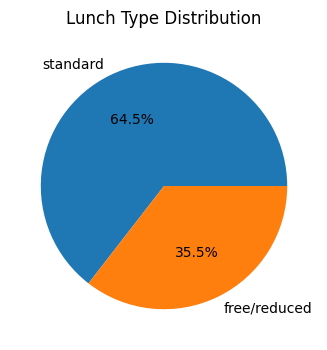

In [21]:
plt.figure(figsize=(8, 4))
plt.pie(students['lunch'].value_counts(), labels=students['lunch'].value_counts().index, autopct='%1.1f%%')
plt.title('Lunch Type Distribution')
plt.show()

**The standard lunch is more common than free/reduced lunch among students**

## Question 4: Are the students mostly ready for the tests or not?

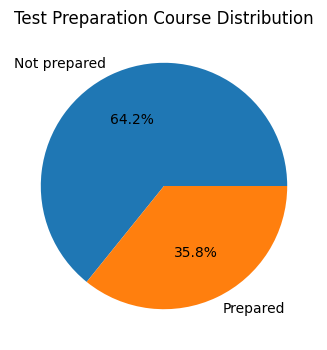

In [22]:
plt.figure(figsize=(8, 4))
plt.pie(students['test preparation course'].value_counts(), labels=students['test preparation course'].value_counts().index, autopct='%1.1f%%')
plt.title('Test Preparation Course Distribution')
plt.show()

**Most students in this data aren't ready for their tests**

## Question 5: What is the average for each subject, and which subject has the highest average?

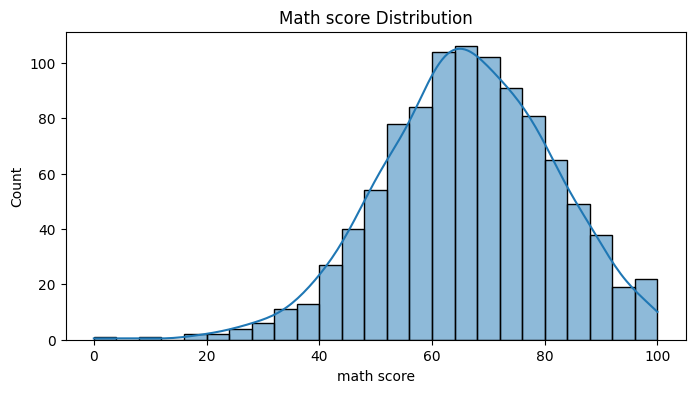

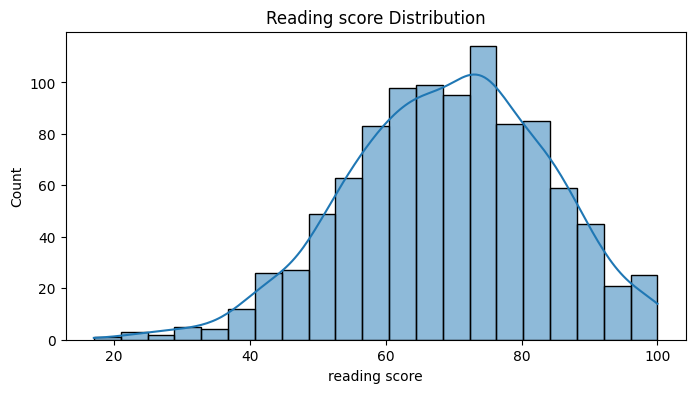

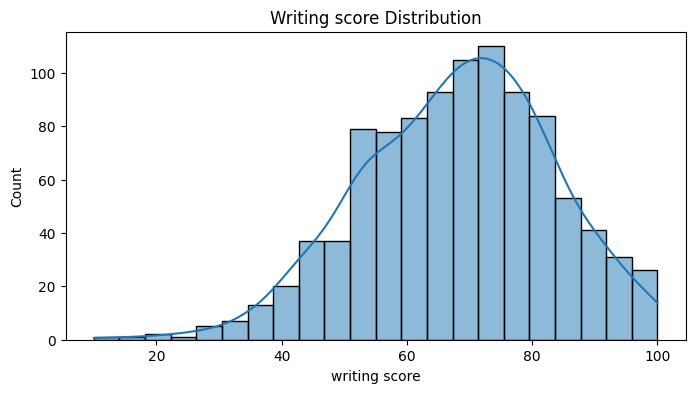

In [23]:
column_names=['math score', 'reading score', 'writing score']
for column in column_names:
  plt.figure(figsize=(8, 4))
  sns.histplot(data=students, x=column, kde=True)
  plt.title(f'{column.capitalize()} Distribution')
  plt.show()
  print() # For easier visibility

The data is analysed as follows:
- Math: The data is slightly left-skewed with an average of about 62 marks

- Reading: The data is also slightly left-skewed with an average of about 67 marks

- Writing: The data is also slightly left-skewed with an average of about 65 marks

Let's take a closer look at the averages to see which subject has the highest average of marks

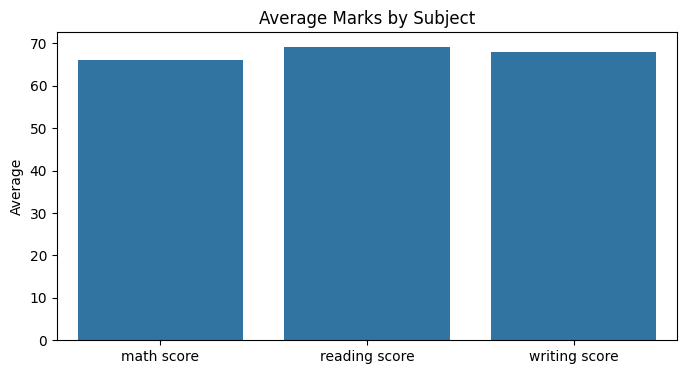

In [24]:
plt.figure(figsize=(8, 4))
sns.barplot(x=column_names, y=students[column_names].mean())
plt.title('Average Marks by Subject')
plt.ylabel("Average")
plt.show()

**As we have seen, Reading has the highest average of marks**

## Question 6: What is the average total score and average percentage?

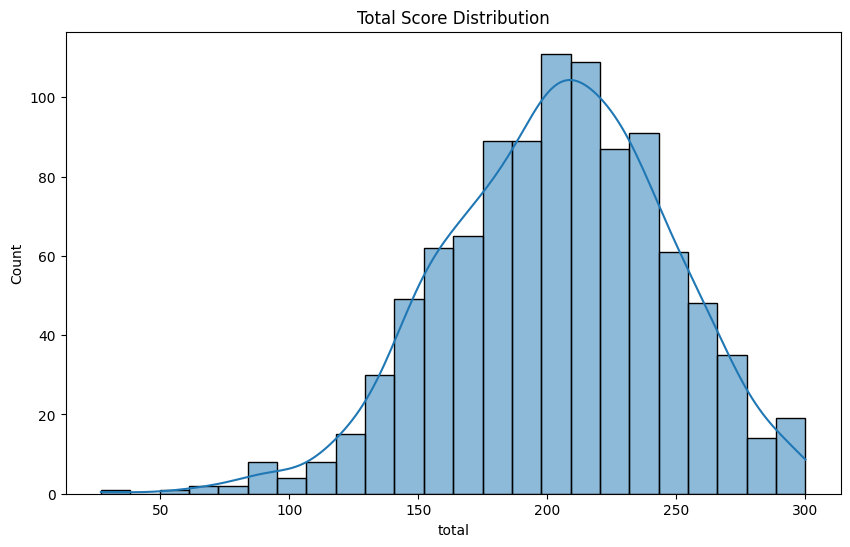

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data=students, x='total', kde=True)
plt.title('Total Score Distribution')
plt.show()

**The data is slightly left skewed, having an average of about 205 marks out of 300 marks**

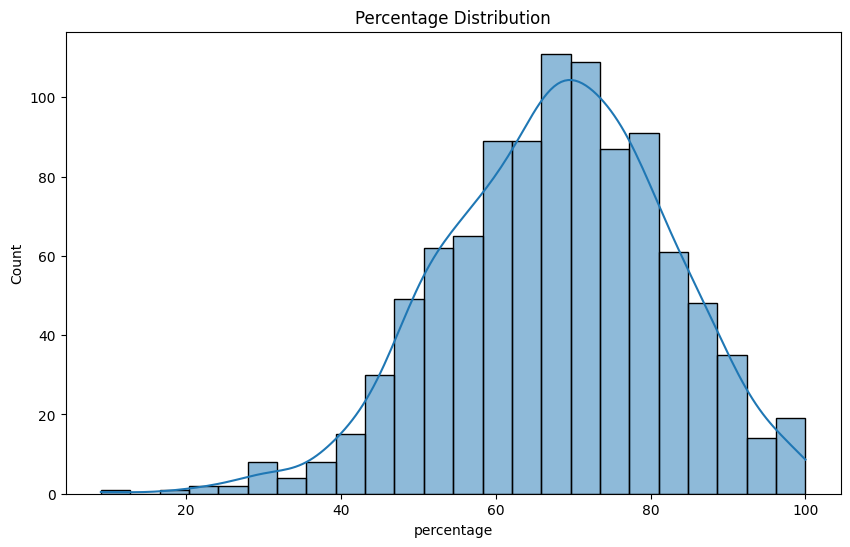

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data=students, x='percentage', kde=True)
plt.title('Percentage Distribution')
plt.show()

**The data is also slightly left skewed, with an average of about 70%**

## Question 7: What is the relation between Parental education and students' percentage?

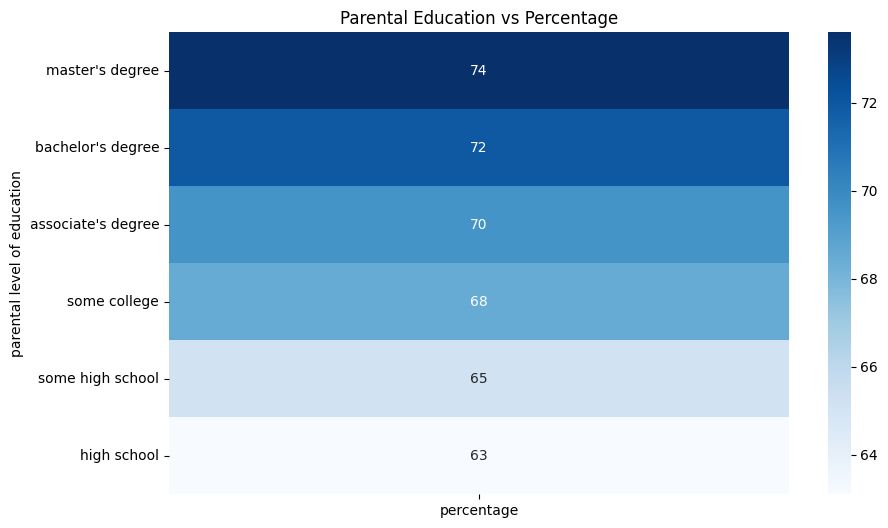

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(students.pivot_table(index='parental level of education', values='percentage', aggfunc='mean').sort_values(by='percentage', ascending=False), annot=True, cmap='Blues')
plt.title('Parental Education vs Percentage')
plt.show()

**There is a slight positive correlation (direct relation) between Parental degree of education and the student's grades, where the better parental education, the higher marks the student gets**

## Question 8: What is the relation between Lunch type and students' percentage?

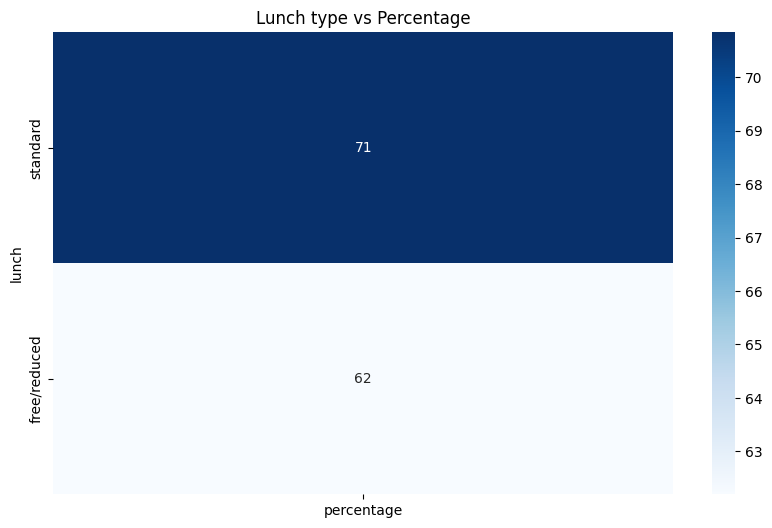

In [28]:
plt.figure(figsize=(10, 6))
sns.heatmap(students.pivot_table(index='lunch', values='percentage', aggfunc='mean').sort_values(by='percentage', ascending=False), annot=True, cmap='Blues')
plt.title('Lunch type vs Percentage')
plt.show()

**There is a slight positive correlation (direct relation), as the students who have Standard Lunch tend to get higher marks than those who have free/reduced Lunch**

## Question 9: What is the relation between Test preparations and students' percentage?

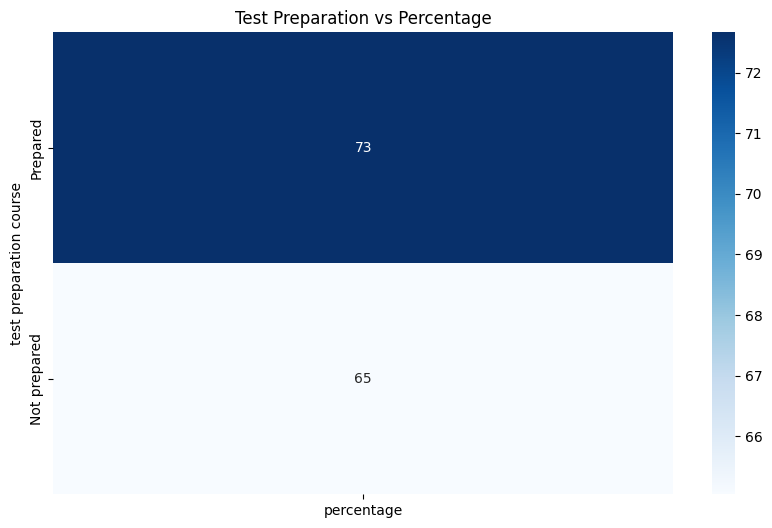

In [29]:
plt.figure(figsize=(10, 6))
sns.heatmap(students.pivot_table(index='test preparation course', values='percentage', aggfunc='mean').sort_values(by='percentage', ascending=False), annot=True, cmap='Blues')
plt.title('Test Preparation vs Percentage')
plt.show()

**Also, there is a positive correlation (direct relation) between test preparation status and Students' percentage, as students who are prepared for the test tend to have higher marks than those who aren't prepared**

## Question 10: What is the relation between Test preparations and Lunch Type?

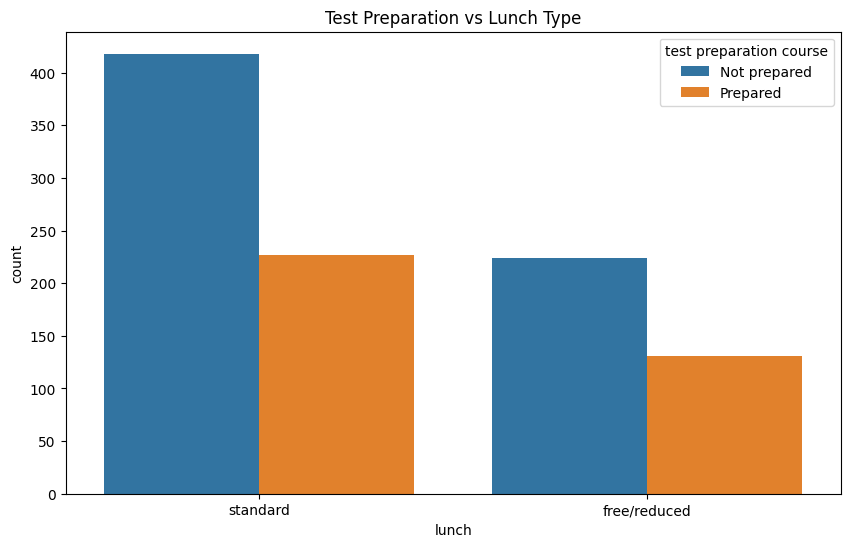

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(data=students, x='lunch', hue='test preparation course')
plt.title('Test Preparation vs Lunch Type')
plt.show()

**There is a dominance in the number of unprepared students, where the number of prepared students and number of unprepared students tend to rise or fall together, with the number of unprepared students always being the higher**

## Question 11: What is the relation between Parental Educational degree and Lunch Type?

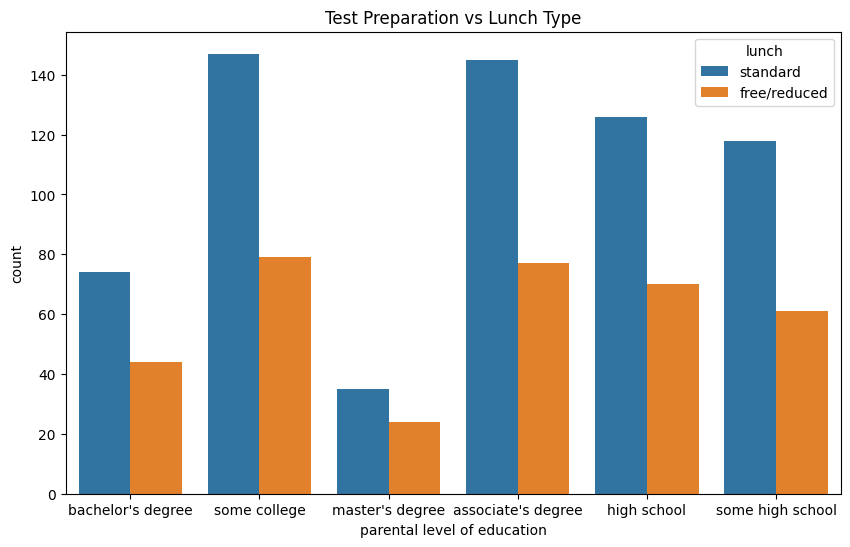

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=students, x='parental level of education', hue='lunch')
plt.title('Test Preparation vs Lunch Type')
plt.show()

**There is dominance of standard lunch across all parental levels of education. Both Lunch Types tend to rise or fall together, with standard Lunch always being the higher**

#
---
---